In [197]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [198]:
data = pd.read_csv('data-uas.csv',
                     names=['branch','cutoff_date','area','region','first_date_disbursement','active_borrowers','active_agent','deliquency_rate','outstanding','weekly_disbursement','weekly_new_borrower_per_bp'])

In [199]:
data

,branch,cutoff_date,area,region,first_date_disbursement,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
0,branch,cutoff_date,area,region,first_date_disbursement,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
1,POINTID_42,10/20/2018,AREAID_27,REGION_JR1,9/9/2017,1108,5,1%-2.5%,"2,150",20,3
2,POINTID_35,10/20/2018,AREAID_1,REGION_JH,7/29/2017,1515,7,5%-10%,"2,500",110,1
3,POINTID_24,10/20/2018,AREAID_20,REGION_JH,6/10/2017,1092,5,2.5%-5%,"1,850",75,7
4,POINTID_62,10/20/2018,AREAID_13,REGION_JR2,5/5/2018,683,3,0%,"1,600",145,17
5,POINTID_45,10/20/2018,AREAID_21,REGION_JR1,9/16/2017,2294,8,0%-1%,"4,300",50,7
6,POINTID_111,10/20/2018,AREAID_12,REGION_JR1,9/22/2018,54,2,0%,150,20,4
7,POINTID_103,10/20/2018,AREAID_18,REGION_JR2,8/18/2018,243,2,0%,650,90,15
8,POINTID_98,10/20/2018,AREAID_10,REGIONID_JT,7/14/2018,430,2,0%,"1,150",110,19
9,POINTID_80,10/20/2018,AREAID_26,REGIONID_N,7/21/2018,235,2,0%,600,85,13


CEK TIPE DATA NUMERICAL

In [200]:
data.dtypes

branch                        object
cutoff_date                   object
area                          object
region                        object
first_date_disbursement       object
active_borrowers              object
active_agent                  object
deliquency_rate               object
outstanding                   object
weekly_disbursement           object
weekly_new_borrower_per_bp    object
dtype: object

In [4]:
data.active_borrowers.mean()

TypeError: Could not convert active_borrowers1108151510926832294542434302355164523855331568132213701973639424434511821722125817407163141082057115298841135125725861586208911735696046855781914185413443742776071462267248231931017629598611496155915325261713115636017431557938150115807838164382163183214048586931486631269518881442104221465548420721218262787190410085646585072655659303172204632111554066352684676289393186253146193015511277384595599184814891558646224151716892531138922345176427781956135198054316862866017914456062101341872137422811882372105446412156246354021579913803393371752134018871238151240158169314578020671180186215061518264357551460544711091827114610816324631744152693233913145248522302655252250164221333185418421676120413711135597299414106727096882241453451782666480117443215412481344325252150111018301678410199811476011961519996192437094151252320515161482870515051739174157726712042477144024618570223298115117251512190535239235015276012876128961991868274313105551507123615555015561151078309298381149455975336822852201188116218460257163214831829149124410632148604266914361772102608510211130111891879149331415231081128197825185623991861879922359423183311171140152632426739431628217132078827071762910795173231881216422520813816720227111908142751147446954958011961751567132020471236412268550615353555101375165728399956853818401544153450931911022712474696174271410257154311581753149351749127717013794742242121278152738422548915218844711066187323343158271264271346241711241130251188126811263472153632733988899118361697180367317142414680462101244422292742153116162118320101233248154715711824144821412318301523140449636638264323521249731418981639100194735112818645184878926434524910527717315314545124649521612184342719315041213416409425489375372768188042014511413941131199288190926561227297186215211310074542661274166415646584481212111106621742426265113886661436120311611179915531450180586418711891813277289791889273612631525201314058493481515184124191132979464244130173321149711521734247153243721791121511501862983436168221216198827641901180611997702066106718866034802106189614962626165015311417399210156120125513714710101139948435151461721864215640110312213728142527882406262611594381512144017871732126717804834121023913511206152414021254395391457239255286131517158717861141239118916111315598514204541611241931728161015225732347142414911132155916214921393391243106921391146644910041763389208158871481932259711610811177815561243459432380144102371864979209541813720581411263038118977731891240211194262415281750143911428491991233278317931189118843536521322718921252197015247633701993009531114417154132144839789282812435613991748724112214429793993851481939136719281174798251286923892054109271124512272788118074341415271698173615038458494720471722154411813518901499177716237205414081062350834814041743143037744711315181981892122590385320328237283186714921010231536919114413271113715871551375258818831015113401491153415573673861442150097715241668110935038012094187611504063522031140110632560231233241411120133381615528176115211170712290189201176170735934012675561867100610591391254278725441813328868513971521113082014981954191013691208282240162259949969917371671123613945179920091872132351479161628835632698169014728043361962279512721876150113633303792489113862901221422541855198284150682421024731490126143153097994621041870142410369887518741734114811991412976115361632149554953013811306811962441077195511482331713136812111121137246435429792200225231055105914139472741470119325321149418431165245150992938137419751046198125062217184462979190398827779413713101720111811192921583444293641487147415911969106430440621213882602915631711110715011316802299572881861146419512458281013543426936186446135814611660234184815531170427285101528061694145410882222001365293918231955511457105494424216901098814711059973239113514592905893021121959218110422421460127413121472786254244185023941902109718371313132387141513981585186218839922885112156516261433224392455814411865139020418501676108412332482021216751776143425193136318211017962933104120614130556619360141713091149771389145428061299144811151093169255292123811944213020815981531141518121218932337104710481871986155218162501537145919082692596015810841405187117471425531197136520841930163294714371869140498610442151829107228071277146154714401517121811371491471789105315221297391846101812873341449226510871006165619015721861185214471631518139574516731572346178114341781184410531675153518331426172610764972965184423341358192215099861396135187616521008131149971831511710442809225712601811831817701085139314131404117712771811300145510721151876925144896419813011211515105102101320601391442177714161390151571816531244172514551076135917141241060150992710441351302185622581427183138814991088293117138914481301880100710734941301844204011158428151811151844964986187818012781670153411741819329782336192210131440184492914401701500116812735410741724142610668312517320181706298318401009104014511721681668137013697141292246165412401366191415031510240186128161876130699447595810631883139917671511983118141110801089539723291121063176717015101731451186116541681252983191411217061009184413991511929118142610742246475172136910801503714541040958144098317241876130610661240831366141110891273116853972816994188314401291668137015002401840232920189531840928100397103267818232816140316969441109831914297916592265481731151116571335111914261875140114281044937139011953105712981226429951115012391056136513301291584345187722301029162714241448150213631818186413771503112971423597281421941691431831191022371657921130118751357909158916471352107170813951819180628590297097618491349101510321010960119814111051049184089813751000932146112851404106912141293821330164990595126113731292118197312962112118129651345144083185914051549991863907731045180589113609031061176016761355192187516182142142310033212802801135018146699916521389547441793182596617961387176488113479451395116683235201995817461731162483694975948981158927921522207769134329721542164512781009531184412481339133688313101066418853613381398115712911241135226170918011782134710701742155212419225101698156415068199262983175814991705863968882134113821145120312831300134713591960121211391394241697199492310041284277218378058798163113099041342133287310579621372117398612231654275929851322900867822172312878781210163210954771893133718391081137814951678195616641257785145079417481332151113271236126589987716851459144285512538948521365273810261622130029411879166012481023119113061458105011331142168994913197998411368158777816051363135743318298481810735170412881291162011931197956875951889108727411543140515991552869129515287951183139716518528131324970116915901179112213178361670126212208131809118471217287591270129529331831124199887841213161007129812441618166011448541226854274412729491300294211951474100712909501184743116713168481789135870716051520174198810491104815379795130612621523168277979711511384120015848607601644849128811701493177812851123111983484336913309221612842119012017811615948274412341550107410347991005114369273014651457129812151172163877312581360980292617091319838115868867412891500817952758329741291416301436834127614327381263986100316061549120613021122111093017232733121288515081140109510668079761427126911691585122976411781225997810720108727321501117271911906131091115129121059119910551275139111891718794149190566513751505137312658087553141147835153873214809461250103294110696858931469989122311991451668136311391051117567176778112951000150888714425927678851098243687120417116301256910102698392665527311104113098872578810711454147912592890147513181511105411977121324113214331065186147812561263123514556601144270566210281111101391877284696910907076045708831426753635973748925114316771398120597512358676112854132184113651108165558114128228531010284611851478126514829486676269171012109810265309031205604132267710271298644104056713321216109696866011701167750717891944718145912667829531017728137812805245059778111004788562129168212612808116014639221093942980595931130639555163793012938325121106892264510596331139828118486066311119041215109392013608579918994895914641236276565883093612335656377745281380597943755795689107216201149681225110626201252923538897758773925482141810248881046118870787088913507217411590103755487313719611208104277012208995344646104995176652552452898835851642719119812009509054251354571108311367627956181341713832864538725102687639311241004104811285005348998531194390673451648251783848011141310694829580425898576756154811571021678783854740561355265611978486239397596474661111682698798658396149035849113538231012810101724701157109083782581581313174301303549375718782324525108665361716115626035531066957130797650774678524144651114781311133089125585238405671040869438102278678553134736462471710171481732395293109563358711556747275847991281659657102882760062433914739537723761136981858239778199555310282867414571088537331751255713334876851073682296128593486342457278469150712647306595116266557976702931018938455687452130411226129805304991472632252355479508647409511561917235776410426745901242609254576426812588357621083710298948799647388583102443267825264236097759047834564644601019231771223331368512496135439374991460868228123910831115133257172770660175049865656350625727082188669942153043914301016991517797198108838151053238164342463684645354050122533976092611071120343353621821777766012237457166471924796251288249572381249210614901016157161244710833446636674601138173139736677396812058273725504695754866044054031753866164594483594843762221591208610124273535061744438213013745895691361095585122523893327314711113471368720118132624365802777434941421171335404687121034599535221244971049577529454421352301329853231065597768371104458981915437706863211208751344431397306135411243148636541753394655543204552952810843091214227865845537931872663940910673883205026243158373413132735553493314814461038263409267128331934263926046951039311741059424191190324981198790128641221462011593153363601026290405217977876299407320102457427722761558712021920565296217419303468247104739944920311762139137025154113353473264902963643864111778422451801932843561029144308113998918434123595352405946685552861006119310002034511404114431524327425126651418228797735196410891735200525139115697718952075681651005125812302312249265341503379111364827347128026737938927015222223229721514411515802393422093371871780543614471156939175102410704382362552539993112851242369567464771723631432519431112453195112819611501690428167521220226434107276257137943318177104026220213902109973351991031141303150915953996854212168941799134985773872452322802421911351610138103991153751059215419235782918128667614014237729221537111825798886563178109189156961476315235938983421011115710133194230106374322930412595265415018461791231282313123566167122911298421889911381517251271159709676681802998892143610908395575017023974833313190202509116012378473064361565981491901952258018426125948119109136918445819217713714110356093582571531081888931122214774988687141203921291224947231401121341055384494119109415639361999310552119224087271219321114292613957884128638913400990704120315233109118569917973103101510421071251108880387102915492026841229810971098218303663397358218943458398848729910501142891031001019470462713226481687568753487279828799729185039462111010218687973461881067951321685254967236065445511193042820436851294861441348795652263236132563498427628409693957741115294422454221086423836241816367112075797065671624294442520111380838582728925110021667612658970350342080775376433982917597020658298325264657717207992611027372647979683198286352931266126167031641105738830159966110573568123758928612664218267788783666578109663581619823913295826371710532104570560566595619280218123375610379247418665053294064673917869103314677463492237943147155101663546310971169192620427629742905361311016316407258796153916201267911629583101398671286437253603657466133236008221996996022706401195395367814859579759020360366911394457558813377558864452789968572753553659015845265725227305015245728994977164838714696885714274104016794645548103573837985286684406573323627395104143584907394003196543337394652596343954663712263206147397353624615982112981765787093374352672626843335734291596673115532214221381054206335452092904106277619450928917826561163410479593162463175444043159313444116138111657835141114227546338127110395534108112330383371108319112524301795103711062643030520414840225530810114672602412032476 to numeric

CONVERT TIPE DATA KE TIPE DATA NUMERIK AGAR BISA UNTUK PERHITUNGAN

In [201]:
data['active_borrowers'] = pd.to_numeric(data['active_borrowers'],errors='coerce')
data['active_agent'] = pd.to_numeric(data['active_agent'],errors='coerce')
data['outstanding'] = pd.to_numeric(data['outstanding'],errors='coerce')
data['weekly_disbursement'] = pd.to_numeric(data['weekly_disbursement'],errors='coerce')
data['weekly_new_borrower_per_bp'] = pd.to_numeric(data['weekly_new_borrower_per_bp'],errors='coerce')

In [202]:
data.dtypes

branch                         object
cutoff_date                    object
area                           object
region                         object
first_date_disbursement        object
active_borrowers              float64
active_agent                  float64
deliquency_rate                object
outstanding                   float64
weekly_disbursement           float64
weekly_new_borrower_per_bp    float64
dtype: object

CEK TIPE DATA NUMERIK

In [6]:
data.active_borrowers.mean()

891.0712935457736

In [7]:
data.outstanding.mean()

2038.0650496141125

In [8]:
data.weekly_new_borrower_per_bp.mean()

11.16223855285472

MENGAMBIL DATA ROW 500-1499 (1000 DATA) SESUAI SOAL UAS

In [9]:
dataset = data.iloc[500:1500,0:11]

In [10]:
dataset

,branch,cutoff_date,area,region,first_date_disbursement,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
500,POINTID_57,9/15/2018,AREAID_24,REGIONID_JT,11/11/2017,1213.0,5.0,0%,1950.0,35.0,7.0
501,POINTID_59,9/15/2018,AREAID_25,REGIONID_JT,5/5/2018,416.0,3.0,0%,1050.0,60.0,11.0
502,POINTID_73,9/15/2018,AREAID_16,REGIONID_JT,5/26/2018,409.0,3.0,0%,1200.0,55.0,6.0
503,POINTID_63,9/15/2018,AREAID_13,REGION_JR2,5/5/2018,425.0,3.0,0%,1000.0,100.0,12.0
504,POINTID_72,9/15/2018,AREAID_19,REGIONID_JT,5/19/2018,489.0,2.0,0%,1300.0,100.0,16.0
505,POINTID_68,9/15/2018,AREAID_5,REGIONID_N,6/30/2018,375.0,2.0,0%,1150.0,80.0,12.0
506,POINTID_107,9/15/2018,AREAID_22,REGIONID_JT,8/25/2018,37.0,2.0,0%,100.0,70.0,12.0
507,POINTID_17,9/15/2018,AREAID_8,REGIONID_JT,3/25/2017,2768.0,12.0,0%,5550.0,205.0,0.0
508,POINTID_43,9/15/2018,AREAID_29,REGION_JH,9/9/2017,1880.0,7.0,>10%,4050.0,0.0,NaN
509,POINTID_65,9/15/2018,AREAID_2,REGION_JR1,5/26/2018,420.0,3.0,0%,1050.0,55.0,7.0


MELIHAT KEDEKATAN ATAU PENGARUH ANTAR FITUR

In [11]:
dataset.corr()

,active_borrowers,active_agent,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
active_borrowers,1.000000,0.916928,0.979359,0.225705,-0.536830
active_agent,0.916928,1.000000,0.902270,0.187484,-0.529988
outstanding,0.979359,0.902270,1.000000,0.251287,-0.523303
weekly_disbursement,0.225705,0.187484,0.251287,1.000000,0.245433
weekly_new_borrower_per_bp,-0.536830,-0.529988,-0.523303,0.245433,1.000000


CONVERT VALUE FITUR DELIQUENCY RATE

In [12]:
a = dataset.deliquency_rate

In [13]:
a.value_counts()

0%         709
2.5%-5%     77
0%-1%       64
1%-2.5%     57
5%-10%      49
>10%        44
Name: deliquency_rate, dtype: int64

In [14]:
def conditions(a):
    if (a['deliquency_rate'] == "0%"):
        return 0
    elif (a['deliquency_rate'] == "0%-1%"):
        return 1
    elif (a['deliquency_rate'] == "1%-2.5%"):
        return 2
    elif (a['deliquency_rate'] == "2.5%-5%"):
        return 3
    elif (a['deliquency_rate'] == "5%-10%"):
        return 4
    else:
        return 5

In [15]:
dataset['deliquency_rate'] = dataset.apply(conditions, axis=1)
dataset['deliquency_rate'] = dataset['deliquency_rate']

CEK MISSING VALUE

In [16]:
dataset.deliquency_rate.isnull().values.any()

False

In [17]:
dataset.active_borrowers.isnull().values.any()

False

In [18]:
dataset.active_agent.isnull().values.any()

False

In [19]:
dataset.outstanding.isnull().values.any()

False

In [20]:
dataset.weekly_disbursement.isnull().values.any()

False

In [21]:
dataset.weekly_new_borrower_per_bp.isnull().values.any()

True

In [22]:
dataset

,branch,cutoff_date,area,region,first_date_disbursement,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
500,POINTID_57,9/15/2018,AREAID_24,REGIONID_JT,11/11/2017,1213.0,5.0,0,1950.0,35.0,7.0
501,POINTID_59,9/15/2018,AREAID_25,REGIONID_JT,5/5/2018,416.0,3.0,0,1050.0,60.0,11.0
502,POINTID_73,9/15/2018,AREAID_16,REGIONID_JT,5/26/2018,409.0,3.0,0,1200.0,55.0,6.0
503,POINTID_63,9/15/2018,AREAID_13,REGION_JR2,5/5/2018,425.0,3.0,0,1000.0,100.0,12.0
504,POINTID_72,9/15/2018,AREAID_19,REGIONID_JT,5/19/2018,489.0,2.0,0,1300.0,100.0,16.0
505,POINTID_68,9/15/2018,AREAID_5,REGIONID_N,6/30/2018,375.0,2.0,0,1150.0,80.0,12.0
506,POINTID_107,9/15/2018,AREAID_22,REGIONID_JT,8/25/2018,37.0,2.0,0,100.0,70.0,12.0
507,POINTID_17,9/15/2018,AREAID_8,REGIONID_JT,3/25/2017,2768.0,12.0,0,5550.0,205.0,0.0
508,POINTID_43,9/15/2018,AREAID_29,REGION_JH,9/9/2017,1880.0,7.0,5,4050.0,0.0,NaN
509,POINTID_65,9/15/2018,AREAID_2,REGION_JR1,5/26/2018,420.0,3.0,0,1050.0,55.0,7.0


MENGISI VALUE PADA FITUR YANG TERDAPAT MISSING VALUE

In [23]:
dataset['weekly_new_borrower_per_bp'] = dataset['weekly_new_borrower_per_bp'].fillna(dataset['weekly_new_borrower_per_bp'].mean())
dataset['weekly_new_borrower_per_bp'] = round(dataset['weekly_new_borrower_per_bp'])

CEK MISSING VALUE LAGI

In [24]:
dataset.weekly_new_borrower_per_bp.isnull().values.any()

False

MELIHAT KEDEKATAN ATAU PENGARUH ANTAR FITUR

In [25]:
dataset.corr()

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
active_borrowers,1.000000,0.916928,0.352378,0.979359,0.225705,-0.515201
active_agent,0.916928,1.000000,0.417417,0.902270,0.187484,-0.503721
deliquency_rate,0.352378,0.417417,1.000000,0.356220,-0.172203,-0.318178
outstanding,0.979359,0.902270,0.356220,1.000000,0.251287,-0.496013
weekly_disbursement,0.225705,0.187484,-0.172203,0.251287,1.000000,0.227135
weekly_new_borrower_per_bp,-0.515201,-0.503721,-0.318178,-0.496013,0.227135,1.000000


UJI COBA 1 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT

In [26]:
dataset1 = dataset.drop(['branch','cutoff_date','area','region','first_date_disbursement'] ,axis=1)

In [27]:
dataset1.corr()

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
active_borrowers,1.000000,0.916928,0.352378,0.979359,0.225705,-0.515201
active_agent,0.916928,1.000000,0.417417,0.902270,0.187484,-0.503721
deliquency_rate,0.352378,0.417417,1.000000,0.356220,-0.172203,-0.318178
outstanding,0.979359,0.902270,0.356220,1.000000,0.251287,-0.496013
weekly_disbursement,0.225705,0.187484,-0.172203,0.251287,1.000000,0.227135
weekly_new_borrower_per_bp,-0.515201,-0.503721,-0.318178,-0.496013,0.227135,1.000000


In [28]:
dataset1.weekly_new_borrower_per_bp.isnull().values.any()

False

In [29]:
dataset1

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
500,1213.0,5.0,0,1950.0,35.0,7.0
501,416.0,3.0,0,1050.0,60.0,11.0
502,409.0,3.0,0,1200.0,55.0,6.0
503,425.0,3.0,0,1000.0,100.0,12.0
504,489.0,2.0,0,1300.0,100.0,16.0
505,375.0,2.0,0,1150.0,80.0,12.0
506,37.0,2.0,0,100.0,70.0,12.0
507,2768.0,12.0,0,5550.0,205.0,0.0
508,1880.0,7.0,5,4050.0,0.0,10.0
509,420.0,3.0,0,1050.0,55.0,7.0


UJI COBA 1.1 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT
             DATA KE 500-1199 (700 DATA)

In [30]:
dataset11 = dataset1.iloc[0:700,0:7]

In [31]:
dataset11

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
500,1213.0,5.0,0,1950.0,35.0,7.0
501,416.0,3.0,0,1050.0,60.0,11.0
502,409.0,3.0,0,1200.0,55.0,6.0
503,425.0,3.0,0,1000.0,100.0,12.0
504,489.0,2.0,0,1300.0,100.0,16.0
505,375.0,2.0,0,1150.0,80.0,12.0
506,37.0,2.0,0,100.0,70.0,12.0
507,2768.0,12.0,0,5550.0,205.0,0.0
508,1880.0,7.0,5,4050.0,0.0,10.0
509,420.0,3.0,0,1050.0,55.0,7.0


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

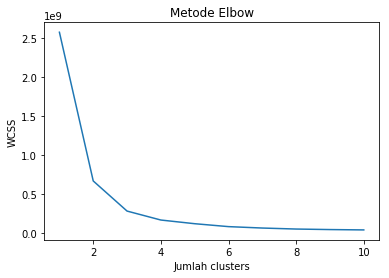

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset11)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

UJI COBA JUMLAH CLUSTER TERBAIK

In [206]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset11['cluster'] = kmeans.fit_predict(dataset11)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset11, dataset11['cluster'], metric='euclidean')
score

0.6371592933412218

In [36]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset11['cluster'] = kmeans.fit_predict(dataset11)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset11, dataset11['cluster'], metric='euclidean')
score

0.6384639992093568

In [37]:
kmeans = KMeans(n_clusters=4, max_iter=10000)
dataset11['cluster'] = kmeans.fit_predict(dataset11)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset11, dataset11['cluster'], metric='euclidean')
score

0.6356219449185648

UJI COBA 1.2 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT
             DATA KE 500-1299 (800 DATA)

In [38]:
dataset12 = dataset1.iloc[0:800,0:7]

In [39]:
dataset12

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
500,1213.0,5.0,0,1950.0,35.0,7.0
501,416.0,3.0,0,1050.0,60.0,11.0
502,409.0,3.0,0,1200.0,55.0,6.0
503,425.0,3.0,0,1000.0,100.0,12.0
504,489.0,2.0,0,1300.0,100.0,16.0
505,375.0,2.0,0,1150.0,80.0,12.0
506,37.0,2.0,0,100.0,70.0,12.0
507,2768.0,12.0,0,5550.0,205.0,0.0
508,1880.0,7.0,5,4050.0,0.0,10.0
509,420.0,3.0,0,1050.0,55.0,7.0


In [40]:
dataset12.corr()

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
active_borrowers,1.000000,0.925212,0.376560,0.980935,0.267422,-0.547682
active_agent,0.925212,1.000000,0.446442,0.906501,0.218781,-0.541986
deliquency_rate,0.376560,0.446442,1.000000,0.380861,-0.241853,-0.380780
outstanding,0.980935,0.906501,0.380861,1.000000,0.307629,-0.532088
weekly_disbursement,0.267422,0.218781,-0.241853,0.307629,1.000000,0.275056
weekly_new_borrower_per_bp,-0.547682,-0.541986,-0.380780,-0.532088,0.275056,1.000000


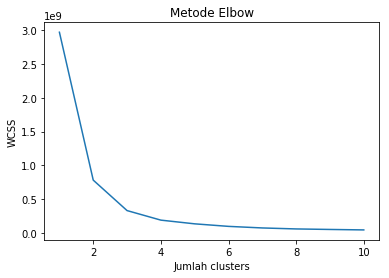

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset12)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

UJI COBA JUMLAH CLUSTER TERBAIK

In [42]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset12['cluster'] = kmeans.fit_predict(dataset12)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset12, dataset12['cluster'], metric='euclidean')
score

0.628678506082743

In [43]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset12['cluster'] = kmeans.fit_predict(dataset12)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset12, dataset12['cluster'], metric='euclidean')
score

0.6303751526645703

In [44]:
kmeans = KMeans(n_clusters=4, max_iter=10000)
dataset12['cluster'] = kmeans.fit_predict(dataset12)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset12, dataset12['cluster'], metric='euclidean')
score

0.6186082898263243

UJI COBA 1.3 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT
             DATA KE 500-1399 (900 DATA)

In [45]:
dataset13 = dataset1.iloc[0:900,0:7]

In [46]:
dataset13

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
500,1213.0,5.0,0,1950.0,35.0,7.0
501,416.0,3.0,0,1050.0,60.0,11.0
502,409.0,3.0,0,1200.0,55.0,6.0
503,425.0,3.0,0,1000.0,100.0,12.0
504,489.0,2.0,0,1300.0,100.0,16.0
505,375.0,2.0,0,1150.0,80.0,12.0
506,37.0,2.0,0,100.0,70.0,12.0
507,2768.0,12.0,0,5550.0,205.0,0.0
508,1880.0,7.0,5,4050.0,0.0,10.0
509,420.0,3.0,0,1050.0,55.0,7.0


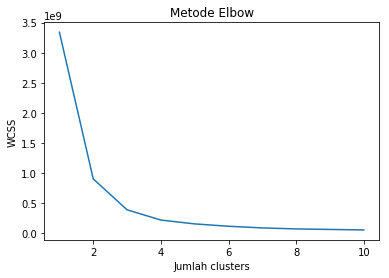

In [47]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset13)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

UJI COBA JUMLAH CLUSTER TERBAIK

In [48]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset13['cluster'] = kmeans.fit_predict(dataset13)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset13, dataset13['cluster'], metric='euclidean')
score

0.6226045716716836

In [49]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset13['cluster'] = kmeans.fit_predict(dataset13)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset13, dataset13['cluster'], metric='euclidean')
score

0.6211211300547226

In [50]:
kmeans = KMeans(n_clusters=4, max_iter=10000)
dataset13['cluster'] = kmeans.fit_predict(dataset13)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset13, dataset13['cluster'], metric='euclidean')
score

0.6157951198976152

UJI COBA 1.4 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT
             DATA KE 500-1499 (1000 DATA)

In [51]:
dataset14 = dataset1.iloc[0:1000,0:7]

In [52]:
dataset14

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
500,1213.0,5.0,0,1950.0,35.0,7.0
501,416.0,3.0,0,1050.0,60.0,11.0
502,409.0,3.0,0,1200.0,55.0,6.0
503,425.0,3.0,0,1000.0,100.0,12.0
504,489.0,2.0,0,1300.0,100.0,16.0
505,375.0,2.0,0,1150.0,80.0,12.0
506,37.0,2.0,0,100.0,70.0,12.0
507,2768.0,12.0,0,5550.0,205.0,0.0
508,1880.0,7.0,5,4050.0,0.0,10.0
509,420.0,3.0,0,1050.0,55.0,7.0


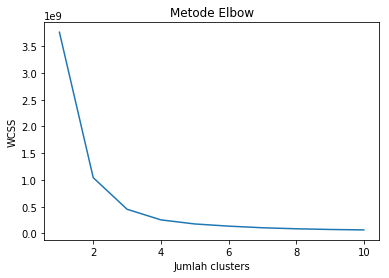

In [53]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset14)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

UJI COBA JUMLAH CLUSTER TERBAIK

In [54]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset14['cluster'] = kmeans.fit_predict(dataset14)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset14, dataset14['cluster'], metric='euclidean')
score

0.6152038355119471

In [55]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset14['cluster'] = kmeans.fit_predict(dataset14)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset14, dataset14['cluster'], metric='euclidean')
score

0.6153981937498538

In [56]:
kmeans = KMeans(n_clusters=4, max_iter=10000)
dataset14['cluster'] = kmeans.fit_predict(dataset14)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset14, dataset14['cluster'], metric='euclidean')
score

0.6108733337365506

UJI COBA 1.5 DATA KE 500-999

In [57]:
dataset15 = dataset1.iloc[0:500,0:5]
kmeans = KMeans(n_clusters=3, max_iter=100000)
dataset15['cluster'] = kmeans.fit_predict(dataset15)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset15, dataset15['cluster'], metric='euclidean')
score

0.643312736807871

In [63]:
dataset15 = dataset1.iloc[0:500,0:5]
kmeans = KMeans(n_clusters=2, max_iter=100000)
dataset15['cluster'] = kmeans.fit_predict(dataset15)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset15, dataset15['cluster'], metric='euclidean')
score

0.6491153077685008

In [78]:
dataset15 = dataset1.iloc[500:900,0:5]
kmeans = KMeans(n_clusters=2, max_iter=100000)
dataset15['cluster'] = kmeans.fit_predict(dataset15)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset15, dataset15['cluster'], metric='euclidean')
score

0.5914918293295637

UJI COBA 1.5 DATA KE 500-1099

In [64]:
dataset16 = dataset1.iloc[0:600,0:5]
kmeans = KMeans(n_clusters=2, max_iter=100000)
dataset16['cluster'] = kmeans.fit_predict(dataset16)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset16, dataset16['cluster'], metric='euclidean')
score

0.6443138622804893

In [59]:
dataset16 = dataset1.iloc[0:600,0:5]
kmeans = KMeans(n_clusters=3, max_iter=100000)
dataset16['cluster'] = kmeans.fit_predict(dataset16)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset16, dataset16['cluster'], metric='euclidean')
score

0.6429861228399338

In [84]:
dataset17 = dataset1.iloc[500:900,0:5]
kmeans = KMeans(n_clusters=3, max_iter=100000)
dataset17['cluster'] = kmeans.fit_predict(dataset17)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset17, dataset17['cluster'], metric='euclidean')
score

0.6010430382453305

UJI COBA 2 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP

In [85]:
dataset2 = dataset.drop(['branch','cutoff_date','area','region','first_date_disbursement','weekly_new_borrower_per_bp'] ,axis=1)

In [86]:
dataset2

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement
500,1213.0,5.0,0,1950.0,35.0
501,416.0,3.0,0,1050.0,60.0
502,409.0,3.0,0,1200.0,55.0
503,425.0,3.0,0,1000.0,100.0
504,489.0,2.0,0,1300.0,100.0
505,375.0,2.0,0,1150.0,80.0
506,37.0,2.0,0,100.0,70.0
507,2768.0,12.0,0,5550.0,205.0
508,1880.0,7.0,5,4050.0,0.0
509,420.0,3.0,0,1050.0,55.0


In [87]:
dataset2.corr()

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement
active_borrowers,1.000000,0.916928,0.352378,0.979359,0.225705
active_agent,0.916928,1.000000,0.417417,0.902270,0.187484
deliquency_rate,0.352378,0.417417,1.000000,0.356220,-0.172203
outstanding,0.979359,0.902270,0.356220,1.000000,0.251287
weekly_disbursement,0.225705,0.187484,-0.172203,0.251287,1.000000


UJI COBA 2.1 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1199 (700 DATA)

In [88]:
dataset21 = dataset2.iloc[0:700,0:6]

In [89]:
dataset21

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement
500,1213.0,5.0,0,1950.0,35.0
501,416.0,3.0,0,1050.0,60.0
502,409.0,3.0,0,1200.0,55.0
503,425.0,3.0,0,1000.0,100.0
504,489.0,2.0,0,1300.0,100.0
505,375.0,2.0,0,1150.0,80.0
506,37.0,2.0,0,100.0,70.0
507,2768.0,12.0,0,5550.0,205.0
508,1880.0,7.0,5,4050.0,0.0
509,420.0,3.0,0,1050.0,55.0


UJI COBA 2.2 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1299 (800 DATA)

In [90]:
dataset22 = dataset2.iloc[0:800,0:6]

In [91]:
dataset22

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement
500,1213.0,5.0,0,1950.0,35.0
501,416.0,3.0,0,1050.0,60.0
502,409.0,3.0,0,1200.0,55.0
503,425.0,3.0,0,1000.0,100.0
504,489.0,2.0,0,1300.0,100.0
505,375.0,2.0,0,1150.0,80.0
506,37.0,2.0,0,100.0,70.0
507,2768.0,12.0,0,5550.0,205.0
508,1880.0,7.0,5,4050.0,0.0
509,420.0,3.0,0,1050.0,55.0


UJI COBA 2.3 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1399 (900 DATA)

In [92]:
dataset23 = dataset2.iloc[0:900,0:6]

In [93]:
dataset23

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement
500,1213.0,5.0,0,1950.0,35.0
501,416.0,3.0,0,1050.0,60.0
502,409.0,3.0,0,1200.0,55.0
503,425.0,3.0,0,1000.0,100.0
504,489.0,2.0,0,1300.0,100.0
505,375.0,2.0,0,1150.0,80.0
506,37.0,2.0,0,100.0,70.0
507,2768.0,12.0,0,5550.0,205.0
508,1880.0,7.0,5,4050.0,0.0
509,420.0,3.0,0,1050.0,55.0


UJI COBA 2.4 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1499 (1000 DATA)

In [94]:
dataset24 = dataset2.iloc[0:1000,0:6]

In [95]:
dataset24

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement
500,1213.0,5.0,0,1950.0,35.0
501,416.0,3.0,0,1050.0,60.0
502,409.0,3.0,0,1200.0,55.0
503,425.0,3.0,0,1000.0,100.0
504,489.0,2.0,0,1300.0,100.0
505,375.0,2.0,0,1150.0,80.0
506,37.0,2.0,0,100.0,70.0
507,2768.0,12.0,0,5550.0,205.0
508,1880.0,7.0,5,4050.0,0.0
509,420.0,3.0,0,1050.0,55.0


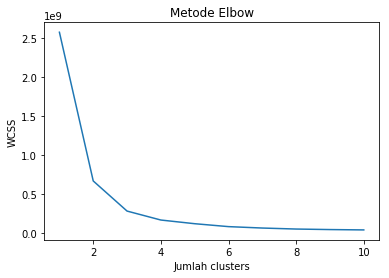

In [96]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset21)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

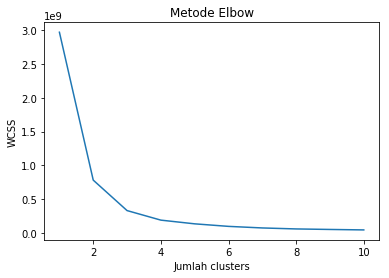

In [97]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset22)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

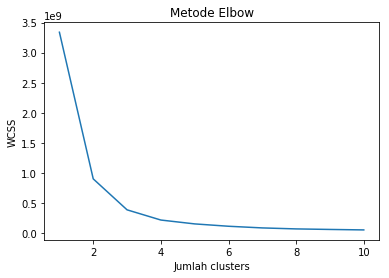

In [98]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset23)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

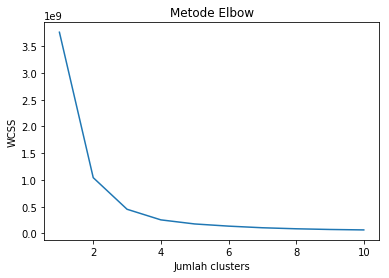

In [99]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset24)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

UJI COBA 2.1 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1199 (700 DATA)
UJI COBA JUMLAH CLUSTER TERBAIK

In [100]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset21['cluster'] = kmeans.fit_predict(dataset21)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset21, dataset21['cluster'], metric='euclidean')
score

0.63719511659815

In [101]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset21['cluster'] = kmeans.fit_predict(dataset21)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset21, dataset21['cluster'], metric='euclidean')
score

0.6385295329191976

In [102]:
kmeans = KMeans(n_clusters=4, max_iter=10000)
dataset21['cluster'] = kmeans.fit_predict(dataset21)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset21, dataset21['cluster'], metric='euclidean')
score

0.6356976945405334

UJI COBA 2.2 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1299 (800 DATA)
UJI COBA JUMLAH CLUSTER TERBAIK

In [103]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset22['cluster'] = kmeans.fit_predict(dataset22)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset22, dataset22['cluster'], metric='euclidean')
score

0.6287113339473988

In [104]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset22['cluster'] = kmeans.fit_predict(dataset22)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset22, dataset22['cluster'], metric='euclidean')
score

0.630437114469617

In [105]:
kmeans = KMeans(n_clusters=4, max_iter=10000)
dataset22['cluster'] = kmeans.fit_predict(dataset22)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset22, dataset22['cluster'], metric='euclidean')
score

0.620325605421941

UJI COBA 2.3 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1399 (900 DATA)
UJI COBA JUMLAH CLUSTER TERBAIK

In [106]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset23['cluster'] = kmeans.fit_predict(dataset23)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset23, dataset23['cluster'], metric='euclidean')
score

0.622636651803831

In [107]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset23['cluster'] = kmeans.fit_predict(dataset23)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset23, dataset23['cluster'], metric='euclidean')
score

0.6211806028380503

In [108]:
kmeans = KMeans(n_clusters=4, max_iter=10000)
dataset23['cluster'] = kmeans.fit_predict(dataset23)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset23, dataset23['cluster'], metric='euclidean')
score

0.6158687299699862

UJI COBA 2.4 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1499 (1000 DATA)
UJI COBA JUMLAH CLUSTER TERBAIK

In [109]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset24['cluster'] = kmeans.fit_predict(dataset24)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset24, dataset24['cluster'], metric='euclidean')
score

0.6152347958712112

In [110]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset24['cluster'] = kmeans.fit_predict(dataset24)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset24, dataset24['cluster'], metric='euclidean')
score

0.6154563543785054

In [111]:
kmeans = KMeans(n_clusters=4, max_iter=10000)
dataset24['cluster'] = kmeans.fit_predict(dataset24)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset24, dataset24['cluster'], metric='euclidean')
score

0.6109462952581162

In [112]:
dataset25 = dataset2.iloc[0:500,0:5]
kmeans = KMeans(n_clusters=2, max_iter=100000)
dataset25['cluster'] = kmeans.fit_predict(dataset25)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset25, dataset25['cluster'], metric='euclidean')
score

0.6491153077685008

In [113]:
dataset25 = dataset2.iloc[0:500,0:5]
kmeans = KMeans(n_clusters=3, max_iter=100000)
dataset25['cluster'] = kmeans.fit_predict(dataset25)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset25, dataset25['cluster'], metric='euclidean')
score

0.643312736807871

In [122]:
dataset26 = dataset1.iloc[0:600,0:5]
kmeans = KMeans(n_clusters=2, max_iter=100000)
dataset26['cluster'] = kmeans.fit_predict(dataset26)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset26, dataset26['cluster'], metric='euclidean')
score

0.6443138622804893

In [114]:
dataset26 = dataset1.iloc[0:600,0:5]
kmeans = KMeans(n_clusters=3, max_iter=100000)
dataset26['cluster'] = kmeans.fit_predict(dataset26)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset26, dataset26['cluster'], metric='euclidean')
score

0.6429861228399338

In [86]:
dataset

,branch,cutoff_date,area,region,first_date_disbursement,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
500,POINTID_57,9/15/2018,AREAID_24,REGIONID_JT,11/11/2017,1213.0,5.0,0,1950.0,35.0,7.0
501,POINTID_59,9/15/2018,AREAID_25,REGIONID_JT,5/5/2018,416.0,3.0,0,1050.0,60.0,11.0
502,POINTID_73,9/15/2018,AREAID_16,REGIONID_JT,5/26/2018,409.0,3.0,0,1200.0,55.0,6.0
503,POINTID_63,9/15/2018,AREAID_13,REGION_JR2,5/5/2018,425.0,3.0,0,1000.0,100.0,12.0
504,POINTID_72,9/15/2018,AREAID_19,REGIONID_JT,5/19/2018,489.0,2.0,0,1300.0,100.0,16.0
505,POINTID_68,9/15/2018,AREAID_5,REGIONID_N,6/30/2018,375.0,2.0,0,1150.0,80.0,12.0
506,POINTID_107,9/15/2018,AREAID_22,REGIONID_JT,8/25/2018,37.0,2.0,0,100.0,70.0,12.0
507,POINTID_17,9/15/2018,AREAID_8,REGIONID_JT,3/25/2017,2768.0,12.0,0,5550.0,205.0,0.0
508,POINTID_43,9/15/2018,AREAID_29,REGION_JH,9/9/2017,1880.0,7.0,5,4050.0,0.0,10.0
509,POINTID_65,9/15/2018,AREAID_2,REGION_JR1,5/26/2018,420.0,3.0,0,1050.0,55.0,7.0


UJI COBA 3 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, DELIQUENCY_RATE, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP

In [115]:
dataset3 = dataset.drop(['branch','cutoff_date','area','region','first_date_disbursement','deliquency_rate','weekly_new_borrower_per_bp'] ,axis=1)

In [116]:
dataset3

,active_borrowers,active_agent,outstanding,weekly_disbursement
500,1213.0,5.0,1950.0,35.0
501,416.0,3.0,1050.0,60.0
502,409.0,3.0,1200.0,55.0
503,425.0,3.0,1000.0,100.0
504,489.0,2.0,1300.0,100.0
505,375.0,2.0,1150.0,80.0
506,37.0,2.0,100.0,70.0
507,2768.0,12.0,5550.0,205.0
508,1880.0,7.0,4050.0,0.0
509,420.0,3.0,1050.0,55.0


In [117]:
dataset3.corr()

,active_borrowers,active_agent,outstanding,weekly_disbursement
active_borrowers,1.000000,0.916928,0.979359,0.225705
active_agent,0.916928,1.000000,0.902270,0.187484
outstanding,0.979359,0.902270,1.000000,0.251287
weekly_disbursement,0.225705,0.187484,0.251287,1.000000


UJI COBA 3.1 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, DELIQUENCY_RATE, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1199 (700 DATA)

In [118]:
dataset31 = dataset3.iloc[0:700,0:7]

UJI COBA 3.2 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, DELIQUENCY_RATE, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1299 (800 DATA)

In [119]:
dataset32 = dataset3.iloc[0:800,0:7]

UJI COBA 3.3 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, DELIQUENCY_RATE, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1399 (900 DATA)

In [120]:
dataset33 = dataset3.iloc[0:900,0:7]

UJI COBA 3.4 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, DELIQUENCY_RATE, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1499 (1000 DATA)

In [121]:
dataset34 = dataset3.iloc[0:1000,0:7]

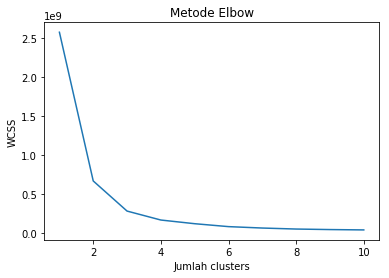

In [94]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset31)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

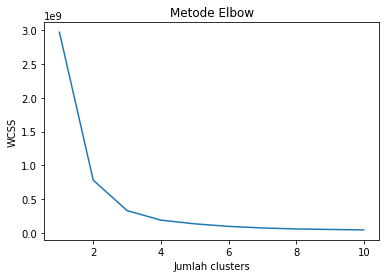

In [95]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset32)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

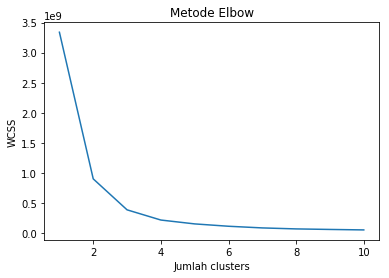

In [96]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset33)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

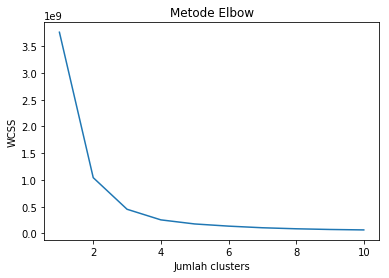

In [97]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset34)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

UJI COBA 3.1 DENGAN MEN-DROP FITUR BRANCH, CUTOFF_DATE, AREA, REGION, DELIQUENCY_RATE, FIRST_DATE_DISBURSEMENT, WEEKLY_NEW_BORROWER_PER_BP
             DATA KE 500-1199 (700 DATA)
UJI COBA JUMLAH CLUSTER TERBAIK

In [98]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset31['cluster'] = kmeans.fit_predict(dataset31)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset31, dataset31['cluster'], metric='euclidean')
score

0.6371957911876082

In [99]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset31['cluster'] = kmeans.fit_predict(dataset31)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset31, dataset31['cluster'], metric='euclidean')
score

0.6385311792139703

In [100]:
kmeans = KMeans(n_clusters=4, max_iter=10000)
dataset31['cluster'] = kmeans.fit_predict(dataset31)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset31, dataset31['cluster'], metric='euclidean')
score

0.6356993346476407

In [124]:
dataset35 = dataset3.iloc[0:500,0:5]
kmeans = KMeans(n_clusters=2, max_iter=100000)
dataset35['cluster'] = kmeans.fit_predict(dataset35)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset35, dataset35['cluster'], metric='euclidean')
score

0.6491160009750636

In [125]:
dataset35 = dataset3.iloc[0:500,0:5]
kmeans = KMeans(n_clusters=3, max_iter=100000)
dataset35['cluster'] = kmeans.fit_predict(dataset35)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset35, dataset35['cluster'], metric='euclidean')
score

0.643314440946515

In [126]:
dataset36 = dataset3.iloc[0:600,0:5]
kmeans = KMeans(n_clusters=2, max_iter=100000)
dataset36['cluster'] = kmeans.fit_predict(dataset36)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset36, dataset36['cluster'], metric='euclidean')
score

0.644314551941993

In [127]:
dataset36 = dataset3.iloc[0:600,0:5]
kmeans = KMeans(n_clusters=3, max_iter=100000)
dataset36['cluster'] = kmeans.fit_predict(dataset36)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset36, dataset36['cluster'], metric='euclidean')
score

0.6429877223716488

In [128]:
dataset

,branch,cutoff_date,area,region,first_date_disbursement,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
500,POINTID_57,9/15/2018,AREAID_24,REGIONID_JT,11/11/2017,1213.0,5.0,0,1950.0,35.0,7.0
501,POINTID_59,9/15/2018,AREAID_25,REGIONID_JT,5/5/2018,416.0,3.0,0,1050.0,60.0,11.0
502,POINTID_73,9/15/2018,AREAID_16,REGIONID_JT,5/26/2018,409.0,3.0,0,1200.0,55.0,6.0
503,POINTID_63,9/15/2018,AREAID_13,REGION_JR2,5/5/2018,425.0,3.0,0,1000.0,100.0,12.0
504,POINTID_72,9/15/2018,AREAID_19,REGIONID_JT,5/19/2018,489.0,2.0,0,1300.0,100.0,16.0
505,POINTID_68,9/15/2018,AREAID_5,REGIONID_N,6/30/2018,375.0,2.0,0,1150.0,80.0,12.0
506,POINTID_107,9/15/2018,AREAID_22,REGIONID_JT,8/25/2018,37.0,2.0,0,100.0,70.0,12.0
507,POINTID_17,9/15/2018,AREAID_8,REGIONID_JT,3/25/2017,2768.0,12.0,0,5550.0,205.0,0.0
508,POINTID_43,9/15/2018,AREAID_29,REGION_JH,9/9/2017,1880.0,7.0,5,4050.0,0.0,10.0
509,POINTID_65,9/15/2018,AREAID_2,REGION_JR1,5/26/2018,420.0,3.0,0,1050.0,55.0,7.0


In [129]:
dataset['cutoff_date'] = pd.to_datetime(dataset.cutoff_date) 
dataset['first_date_disbursement'] = pd.to_datetime(dataset.first_date_disbursement) 

In [130]:
dataset

,branch,cutoff_date,area,region,first_date_disbursement,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
500,POINTID_57,2018-09-15,AREAID_24,REGIONID_JT,2017-11-11,1213.0,5.0,0,1950.0,35.0,7.0
501,POINTID_59,2018-09-15,AREAID_25,REGIONID_JT,2018-05-05,416.0,3.0,0,1050.0,60.0,11.0
502,POINTID_73,2018-09-15,AREAID_16,REGIONID_JT,2018-05-26,409.0,3.0,0,1200.0,55.0,6.0
503,POINTID_63,2018-09-15,AREAID_13,REGION_JR2,2018-05-05,425.0,3.0,0,1000.0,100.0,12.0
504,POINTID_72,2018-09-15,AREAID_19,REGIONID_JT,2018-05-19,489.0,2.0,0,1300.0,100.0,16.0
505,POINTID_68,2018-09-15,AREAID_5,REGIONID_N,2018-06-30,375.0,2.0,0,1150.0,80.0,12.0
506,POINTID_107,2018-09-15,AREAID_22,REGIONID_JT,2018-08-25,37.0,2.0,0,100.0,70.0,12.0
507,POINTID_17,2018-09-15,AREAID_8,REGIONID_JT,2017-03-25,2768.0,12.0,0,5550.0,205.0,0.0
508,POINTID_43,2018-09-15,AREAID_29,REGION_JH,2017-09-09,1880.0,7.0,5,4050.0,0.0,10.0
509,POINTID_65,2018-09-15,AREAID_2,REGION_JR1,2018-05-26,420.0,3.0,0,1050.0,55.0,7.0


In [131]:
dataset['jangka_waktu_pinjam'] = dataset['cutoff_date'] - dataset['first_date_disbursement']

In [132]:
dataset['jangka_waktu_pinjam'] = dataset['jangka_waktu_pinjam']

In [133]:
dataset.corr()

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp
active_borrowers,1.000000,0.916928,0.352378,0.979359,0.225705,-0.515201
active_agent,0.916928,1.000000,0.417417,0.902270,0.187484,-0.503721
deliquency_rate,0.352378,0.417417,1.000000,0.356220,-0.172203,-0.318178
outstanding,0.979359,0.902270,0.356220,1.000000,0.251287,-0.496013
weekly_disbursement,0.225705,0.187484,-0.172203,0.251287,1.000000,0.227135
weekly_new_borrower_per_bp,-0.515201,-0.503721,-0.318178,-0.496013,0.227135,1.000000


In [134]:
dataset

,branch,cutoff_date,area,region,first_date_disbursement,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp,jangka_waktu_pinjam
500,POINTID_57,2018-09-15,AREAID_24,REGIONID_JT,2017-11-11,1213.0,5.0,0,1950.0,35.0,7.0,308 days
501,POINTID_59,2018-09-15,AREAID_25,REGIONID_JT,2018-05-05,416.0,3.0,0,1050.0,60.0,11.0,133 days
502,POINTID_73,2018-09-15,AREAID_16,REGIONID_JT,2018-05-26,409.0,3.0,0,1200.0,55.0,6.0,112 days
503,POINTID_63,2018-09-15,AREAID_13,REGION_JR2,2018-05-05,425.0,3.0,0,1000.0,100.0,12.0,133 days
504,POINTID_72,2018-09-15,AREAID_19,REGIONID_JT,2018-05-19,489.0,2.0,0,1300.0,100.0,16.0,119 days
505,POINTID_68,2018-09-15,AREAID_5,REGIONID_N,2018-06-30,375.0,2.0,0,1150.0,80.0,12.0,77 days
506,POINTID_107,2018-09-15,AREAID_22,REGIONID_JT,2018-08-25,37.0,2.0,0,100.0,70.0,12.0,21 days
507,POINTID_17,2018-09-15,AREAID_8,REGIONID_JT,2017-03-25,2768.0,12.0,0,5550.0,205.0,0.0,539 days
508,POINTID_43,2018-09-15,AREAID_29,REGION_JH,2017-09-09,1880.0,7.0,5,4050.0,0.0,10.0,371 days
509,POINTID_65,2018-09-15,AREAID_2,REGION_JR1,2018-05-26,420.0,3.0,0,1050.0,55.0,7.0,112 days


In [135]:
dataset

,branch,cutoff_date,area,region,first_date_disbursement,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp,jangka_waktu_pinjam
500,POINTID_57,2018-09-15,AREAID_24,REGIONID_JT,2017-11-11,1213.0,5.0,0,1950.0,35.0,7.0,308 days
501,POINTID_59,2018-09-15,AREAID_25,REGIONID_JT,2018-05-05,416.0,3.0,0,1050.0,60.0,11.0,133 days
502,POINTID_73,2018-09-15,AREAID_16,REGIONID_JT,2018-05-26,409.0,3.0,0,1200.0,55.0,6.0,112 days
503,POINTID_63,2018-09-15,AREAID_13,REGION_JR2,2018-05-05,425.0,3.0,0,1000.0,100.0,12.0,133 days
504,POINTID_72,2018-09-15,AREAID_19,REGIONID_JT,2018-05-19,489.0,2.0,0,1300.0,100.0,16.0,119 days
505,POINTID_68,2018-09-15,AREAID_5,REGIONID_N,2018-06-30,375.0,2.0,0,1150.0,80.0,12.0,77 days
506,POINTID_107,2018-09-15,AREAID_22,REGIONID_JT,2018-08-25,37.0,2.0,0,100.0,70.0,12.0,21 days
507,POINTID_17,2018-09-15,AREAID_8,REGIONID_JT,2017-03-25,2768.0,12.0,0,5550.0,205.0,0.0,539 days
508,POINTID_43,2018-09-15,AREAID_29,REGION_JH,2017-09-09,1880.0,7.0,5,4050.0,0.0,10.0,371 days
509,POINTID_65,2018-09-15,AREAID_2,REGION_JR1,2018-05-26,420.0,3.0,0,1050.0,55.0,7.0,112 days


In [136]:
f = dataset['jangka_waktu_pinjam']

In [137]:
type(f)

pandas.core.series.Series

In [138]:
dataset['jangka_waktu_pinjam'] = dataset['jangka_waktu_pinjam'].dt.days

In [139]:
dataset

,branch,cutoff_date,area,region,first_date_disbursement,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp,jangka_waktu_pinjam
500,POINTID_57,2018-09-15,AREAID_24,REGIONID_JT,2017-11-11,1213.0,5.0,0,1950.0,35.0,7.0,308
501,POINTID_59,2018-09-15,AREAID_25,REGIONID_JT,2018-05-05,416.0,3.0,0,1050.0,60.0,11.0,133
502,POINTID_73,2018-09-15,AREAID_16,REGIONID_JT,2018-05-26,409.0,3.0,0,1200.0,55.0,6.0,112
503,POINTID_63,2018-09-15,AREAID_13,REGION_JR2,2018-05-05,425.0,3.0,0,1000.0,100.0,12.0,133
504,POINTID_72,2018-09-15,AREAID_19,REGIONID_JT,2018-05-19,489.0,2.0,0,1300.0,100.0,16.0,119
505,POINTID_68,2018-09-15,AREAID_5,REGIONID_N,2018-06-30,375.0,2.0,0,1150.0,80.0,12.0,77
506,POINTID_107,2018-09-15,AREAID_22,REGIONID_JT,2018-08-25,37.0,2.0,0,100.0,70.0,12.0,21
507,POINTID_17,2018-09-15,AREAID_8,REGIONID_JT,2017-03-25,2768.0,12.0,0,5550.0,205.0,0.0,539
508,POINTID_43,2018-09-15,AREAID_29,REGION_JH,2017-09-09,1880.0,7.0,5,4050.0,0.0,10.0,371
509,POINTID_65,2018-09-15,AREAID_2,REGION_JR1,2018-05-26,420.0,3.0,0,1050.0,55.0,7.0,112


In [140]:
dataset.corr()

,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp,jangka_waktu_pinjam
active_borrowers,1.000000,0.916928,0.352378,0.979359,0.225705,-0.515201,0.820332
active_agent,0.916928,1.000000,0.417417,0.902270,0.187484,-0.503721,0.846383
deliquency_rate,0.352378,0.417417,1.000000,0.356220,-0.172203,-0.318178,0.577433
outstanding,0.979359,0.902270,0.356220,1.000000,0.251287,-0.496013,0.788210
weekly_disbursement,0.225705,0.187484,-0.172203,0.251287,1.000000,0.227135,0.029496
weekly_new_borrower_per_bp,-0.515201,-0.503721,-0.318178,-0.496013,0.227135,1.000000,-0.556440
jangka_waktu_pinjam,0.820332,0.846383,0.577433,0.788210,0.029496,-0.556440,1.000000


In [141]:
dataset.deliquency_rate.isnull().values.any()

False

In [142]:
dataset.active_borrowers.isnull().values.any()

False

In [143]:
dataset.jangka_waktu_pinjam.isnull().values.any()

False

In [144]:
g = dataset.area
g.value_counts()

AREAID_7     69
AREAID_21    69
AREAID_27    68
AREAID_14    67
AREAID_8     66
AREAID_29    66
AREAID_24    65
AREAID_1     53
AREAID_13    42
AREAID_20    41
AREAID_25    34
AREAID_5     34
AREAID_19    33
AREAID_16    31
AREAID_2     28
AREAID_6     26
AREAID_30    26
AREAID_9     26
AREAID_28    24
AREAID_26    22
AREAID_4     15
AREAID_23    14
AREAID_15    14
AREAID_18    13
AREAID_31    13
AREAID_11    12
AREAID_22    12
AREAID_10    10
AREAID_17     4
AREAID_12     3
Name: area, dtype: int64

In [145]:
b = dataset.region
b.value_counts()

REGIONID_JT    316
REGION_JR1     206
REGION_JH      191
REGIONID_N     151
REGION_JR2     136
Name: region, dtype: int64

In [146]:
g = dataset.region

In [147]:
def conditions(g):
    if (g['region'] == "REGION_JR2"):
        return 0
    elif (g['region'] == "REGIONID_N"):
        return 1
    elif (g['region'] == "REGION_JH"):
        return 2
    elif (g['region'] == "REGION_JR1"):
        return 3
    else:
        return 4

In [148]:
dataset['region'] = dataset.apply(conditions, axis=1)
dataset['region'] = dataset['region']

In [149]:
dataset

,branch,cutoff_date,area,region,first_date_disbursement,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp,jangka_waktu_pinjam
500,POINTID_57,2018-09-15,AREAID_24,4,2017-11-11,1213.0,5.0,0,1950.0,35.0,7.0,308
501,POINTID_59,2018-09-15,AREAID_25,4,2018-05-05,416.0,3.0,0,1050.0,60.0,11.0,133
502,POINTID_73,2018-09-15,AREAID_16,4,2018-05-26,409.0,3.0,0,1200.0,55.0,6.0,112
503,POINTID_63,2018-09-15,AREAID_13,0,2018-05-05,425.0,3.0,0,1000.0,100.0,12.0,133
504,POINTID_72,2018-09-15,AREAID_19,4,2018-05-19,489.0,2.0,0,1300.0,100.0,16.0,119
505,POINTID_68,2018-09-15,AREAID_5,1,2018-06-30,375.0,2.0,0,1150.0,80.0,12.0,77
506,POINTID_107,2018-09-15,AREAID_22,4,2018-08-25,37.0,2.0,0,100.0,70.0,12.0,21
507,POINTID_17,2018-09-15,AREAID_8,4,2017-03-25,2768.0,12.0,0,5550.0,205.0,0.0,539
508,POINTID_43,2018-09-15,AREAID_29,2,2017-09-09,1880.0,7.0,5,4050.0,0.0,10.0,371
509,POINTID_65,2018-09-15,AREAID_2,3,2018-05-26,420.0,3.0,0,1050.0,55.0,7.0,112


In [150]:
b = dataset.region
b.value_counts()

4    316
3    206
2    191
1    151
0    136
Name: region, dtype: int64

In [151]:
dataset.corr()

,region,active_borrowers,active_agent,deliquency_rate,outstanding,weekly_disbursement,weekly_new_borrower_per_bp,jangka_waktu_pinjam
region,1.000000,-0.019887,0.061473,0.038608,-0.048145,-0.132871,-0.035316,0.126604
active_borrowers,-0.019887,1.000000,0.916928,0.352378,0.979359,0.225705,-0.515201,0.820332
active_agent,0.061473,0.916928,1.000000,0.417417,0.902270,0.187484,-0.503721,0.846383
deliquency_rate,0.038608,0.352378,0.417417,1.000000,0.356220,-0.172203,-0.318178,0.577433
outstanding,-0.048145,0.979359,0.902270,0.356220,1.000000,0.251287,-0.496013,0.788210
weekly_disbursement,-0.132871,0.225705,0.187484,-0.172203,0.251287,1.000000,0.227135,0.029496
weekly_new_borrower_per_bp,-0.035316,-0.515201,-0.503721,-0.318178,-0.496013,0.227135,1.000000,-0.556440
jangka_waktu_pinjam,0.126604,0.820332,0.846383,0.577433,0.788210,0.029496,-0.556440,1.000000


In [152]:
dataset.groupby(["area", "region"]).size()

area       region
AREAID_1   2         53
AREAID_10  4         10
AREAID_11  2         12
AREAID_12  3          3
AREAID_13  0         42
AREAID_14  0         67
AREAID_15  3         14
AREAID_16  4         31
AREAID_17  2          4
AREAID_18  0         13
AREAID_19  4         33
AREAID_2   3         28
AREAID_20  2         41
AREAID_21  3         69
AREAID_22  4         12
AREAID_23  0         14
AREAID_24  4         65
AREAID_25  4         34
AREAID_26  1         22
AREAID_27  3         68
AREAID_28  3         24
AREAID_29  2         66
AREAID_30  4         26
AREAID_31  4         13
AREAID_4   2         15
AREAID_5   1         34
AREAID_6   4         26
AREAID_7   1         69
AREAID_8   4         66
AREAID_9   1         26
dtype: int64

In [153]:
count = dataset.groupby(['region', 'area']).size() 
print(count) 

region  area     
0       AREAID_13    42
        AREAID_14    67
        AREAID_18    13
        AREAID_23    14
1       AREAID_26    22
        AREAID_5     34
        AREAID_7     69
        AREAID_9     26
2       AREAID_1     53
        AREAID_11    12
        AREAID_17     4
        AREAID_20    41
        AREAID_29    66
        AREAID_4     15
3       AREAID_12     3
        AREAID_15    14
        AREAID_2     28
        AREAID_21    69
        AREAID_27    68
        AREAID_28    24
4       AREAID_10    10
        AREAID_16    31
        AREAID_19    33
        AREAID_22    12
        AREAID_24    65
        AREAID_25    34
        AREAID_30    26
        AREAID_31    13
        AREAID_6     26
        AREAID_8     66
dtype: int64


In [208]:
dataset4 = dataset.drop(['branch','cutoff_date','area','region','first_date_disbursement','weekly_new_borrower_per_bp'] ,axis=1)

In [210]:
dataset4.corr()

,active_borrowers,active_agent,deliquency_rate,outstanding,jangka_waktu_pinjam
active_borrowers,1.000000,0.916928,0.352378,0.979359,0.820332
active_agent,0.916928,1.000000,0.417417,0.902270,0.846383
deliquency_rate,0.352378,0.417417,1.000000,0.356220,0.577433
outstanding,0.979359,0.902270,0.356220,1.000000,0.788210
jangka_waktu_pinjam,0.820332,0.846383,0.577433,0.788210,1.000000


In [209]:
dataset4 = dataset4.drop(['weekly_disbursement'] ,axis=1)

In [157]:
dataset41 = dataset4.iloc[0:700,0:5]

In [158]:
dataset42 = dataset4.iloc[0:800,0:5]

In [159]:
dataset43 = dataset4.iloc[0:900,0:5]

In [160]:
dataset44 = dataset4.iloc[0:1000,0:5]

In [161]:
dataset45 = dataset4.iloc[0:600,0:5]

In [211]:
dataset46 = dataset4.iloc[0:500,0:5]

In [164]:
dataset46

,active_borrowers,active_agent,deliquency_rate,outstanding,jangka_waktu_pinjam
500,1213.0,5.0,0,1950.0,308
501,416.0,3.0,0,1050.0,133
502,409.0,3.0,0,1200.0,112
503,425.0,3.0,0,1000.0,133
504,489.0,2.0,0,1300.0,119
505,375.0,2.0,0,1150.0,77
506,37.0,2.0,0,100.0,21
507,2768.0,12.0,0,5550.0,539
508,1880.0,7.0,5,4050.0,371
509,420.0,3.0,0,1050.0,112


In [165]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset41['cluster'] = kmeans.fit_predict(dataset41)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset41, dataset41['cluster'], metric='euclidean')
score

0.6373627874508991

In [166]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset41['cluster'] = kmeans.fit_predict(dataset41)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset41, dataset41['cluster'], metric='euclidean')
score

0.6385476416720974

In [167]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset42['cluster'] = kmeans.fit_predict(dataset42)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset42, dataset42['cluster'], metric='euclidean')
score

0.6299256208562436

In [168]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset42['cluster'] = kmeans.fit_predict(dataset42)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset42, dataset42['cluster'], metric='euclidean')
score

0.6297855866131212

In [169]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset43['cluster'] = kmeans.fit_predict(dataset43)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset43, dataset43['cluster'], metric='euclidean')
score

0.6232242782095515

In [170]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset43['cluster'] = kmeans.fit_predict(dataset43)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset43, dataset43['cluster'], metric='euclidean')
score

0.6207318992866893

In [172]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset44['cluster'] = kmeans.fit_predict(dataset44)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset44, dataset44['cluster'], metric='euclidean')
score

0.6160651315643209

In [171]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset44['cluster'] = kmeans.fit_predict(dataset44)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset44, dataset44['cluster'], metric='euclidean')
score

0.6165186021467253

In [174]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset45['cluster'] = kmeans.fit_predict(dataset45)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset45, dataset45['cluster'], metric='euclidean')
score

0.6443428475133106

In [173]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset45['cluster'] = kmeans.fit_predict(dataset45)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset45, dataset45['cluster'], metric='euclidean')
score

0.6424788093723318

In [217]:
kmeans = KMeans(n_clusters=2, max_iter=10000)
dataset46['cluster'] = kmeans.fit_predict(dataset46)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset46, dataset46['cluster'], metric='euclidean')
score

0.6493175112255162

In [216]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset46['cluster'] = kmeans.fit_predict(dataset46)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset46, dataset46['cluster'], metric='euclidean')
score

0.6429690870560772

In [178]:
dataset49 = dataset4.iloc[400:1000,0:5]

In [179]:
dataset49

,active_borrowers,active_agent,deliquency_rate,outstanding,jangka_waktu_pinjam
900,56.0,2.0,0,100.0,21
901,1867.0,6.0,5,4850.0,644
902,1006.0,3.0,1,2800.0,392
903,1059.0,6.0,4,2150.0,476
904,139.0,2.0,0,450.0,28
905,1254.0,7.0,5,2600.0,707
906,2787.0,9.0,3,6550.0,511
907,2544.0,7.0,0,6050.0,385
908,181.0,2.0,0,550.0,28
909,33.0,2.0,0,100.0,7


In [218]:
dataset49 = dataset4.iloc[500:1000,0:5]
kmeans = KMeans(n_clusters=3, max_iter=100000)
dataset49['cluster'] = kmeans.fit_predict(dataset49)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset49, dataset49['cluster'], metric='euclidean')
score

0.5994151102347464

In [182]:
kmeans = KMeans(n_clusters=3, max_iter=10000)
dataset49['cluster'] = kmeans.fit_predict(dataset49)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset49, dataset49['cluster'], metric='euclidean')
score

0.6057248720519894

HASIL PEMILIHAN FITUR ATAU ATRIBUT TERBAIK DAN JUMLAH CLUSTER TERBAIK YAITU MENGGUNAKAN FITUR/ATRIBUT 'active_borrowers',	'active_agent',	'deliquency_rate',	'outstanding',	'jangka_waktu_pinjam (Didapat dari selisih atribut 'cutoff_date' -   
    atribut 'first_date_disbursement') DENGAN JUMLAH CLUSTER 2 MENGHASILKAN SIHOUETTE SCORE 0,6493175112 (PADA DATASET 46 YAITU     DATASET BERISI DATA KE 500-999 (500 DATA))

HASIL CLUSTER TERBAIK UNTUK DIVISUALISASIKAN

In [218]:
dataset46.corr()

,active_borrowers,active_agent,deliquency_rate,outstanding,jangka_waktu_pinjam,cluster
active_borrowers,1.000000,0.923578,0.412985,0.983766,0.843650,-0.870029
active_agent,0.923578,1.000000,0.476104,0.903381,0.862843,-0.869228
deliquency_rate,0.412985,0.476104,1.000000,0.418894,0.619416,-0.512801
outstanding,0.983766,0.903381,0.418894,1.000000,0.815079,-0.866729
jangka_waktu_pinjam,0.843650,0.862843,0.619416,0.815079,1.000000,-0.820222
cluster,-0.870029,-0.869228,-0.512801,-0.866729,-0.820222,1.000000


In [219]:
dataset46['cluster'] = dataset46.cluster

In [220]:
dataset46

,active_borrowers,active_agent,deliquency_rate,outstanding,jangka_waktu_pinjam,cluster
500,1213.0,5.0,0,1950.0,308,1
501,416.0,3.0,0,1050.0,133,1
502,409.0,3.0,0,1200.0,112,1
503,425.0,3.0,0,1000.0,133,1
504,489.0,2.0,0,1300.0,119,1
505,375.0,2.0,0,1150.0,77,1
506,37.0,2.0,0,100.0,21,1
507,2768.0,12.0,0,5550.0,539,0
508,1880.0,7.0,5,4050.0,371,0
509,420.0,3.0,0,1050.0,112,1


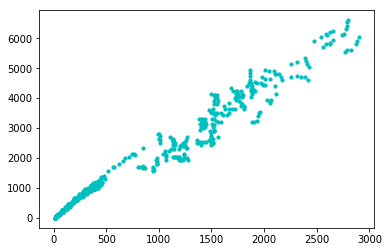

In [192]:
plt.scatter(dataset46.active_borrowers, dataset46.outstanding, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

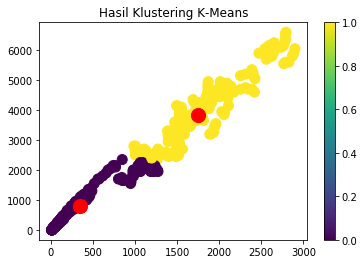

In [194]:
output = plt.scatter(dataset46.active_borrowers, dataset46.outstanding, s = 100, c = dataset46.cluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,3], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

SUMBU X = FITUR/ATRIBUT 'active_borrowers' DAN SUMBU Y = FITUR/ATRIBUT 'outstanding' DIMANA BULAT MERAH ADALAH CENTROID

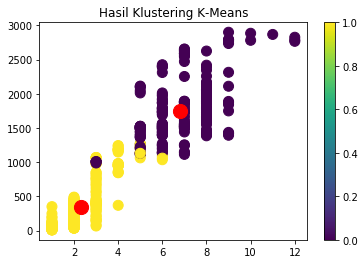

In [242]:
output = plt.scatter(dataset46.active_agent, dataset46.active_borrowers, s = 100, c = dataset46.cluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,0], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

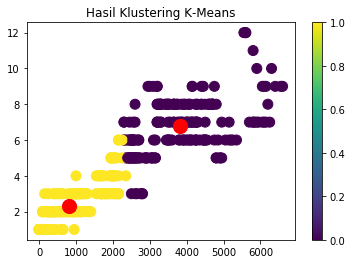

In [232]:
output = plt.scatter(dataset46.outstanding, dataset46.active_agent, s = 100, c = dataset46.cluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,3], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

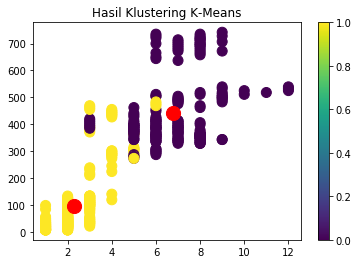

In [240]:
output = plt.scatter(dataset46.active_agent, dataset46.jangka_waktu_pinjam, s = 100, c = dataset46.cluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,4], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

In [203]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset46)

In [204]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dataset46, y_hc, metric='euclidean')
score

0.6363861009274956

In [205]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset46)

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset46, y_hc, metric='euclidean')
score

0.6385358408016295